In [2]:
import pandas as pd
import numpy as np

# Load the data

file_path = "C:/Users/ligea/Desktop/myData/June 16 data.csv"
df = pd.read_csv(file_path)

# Display data structure and format
print("Data Structure:")
print(df.info())

# Display the first few rows
print("\nFirst Few Rows:")
print(df.head())

Data Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   days           10000 non-null  int64 
 1   gender         10000 non-null  object
 2   age            10000 non-null  object
 3   race           10000 non-null  object
 4   weight         10000 non-null  object
 5   admit_type_id  10000 non-null  int64 
 6   metformin      10000 non-null  object
 7   insulin        10000 non-null  object
 8   readmitted     10000 non-null  object
 9   num_procs      10000 non-null  int64 
 10  num_meds       10000 non-null  int64 
 11  num_ip         10000 non-null  int64 
 12  num_diags      10000 non-null  int64 
dtypes: int64(6), object(7)
memory usage: 1015.8+ KB
None

First Few Rows:
   days  gender      age             race weight  admit_type_id metformin  \
0     1    Male  [70-80)  AfricanAmerican      ?              1        No   
1 

In [3]:
####################################################################
### Part A: Validate and Clean data                              ###
####################################################################

# A.1 Check missing values

# number of total rows
num_rows = len(df)

# number of rows with no null values
rows_no_null = df.dropna()

# number of rows with at least one null value
rows_with_null = df[df.isnull().any(axis=1)]

# Print the results
print("Number of rows: ", num_rows)
print("Number of rows with no null values: ", len(rows_no_null))
print("Number of rows with at least one null value: ", len(rows_with_null))

# check missing values in each column
for col in df.columns:
    count_missing = df[col].isna().sum()
    count_unknow = len( df[df[col]=="?"] )
    if count_missing>0 or count_unknow>0:
        print(col,"has count_missing: ", count_missing)
        print(col,"has count_unknow: ", count_unknow)

Number of rows:  10000
Number of rows with no null values:  10000
Number of rows with at least one null value:  0
race has count_missing:  0
race has count_unknow:  226
weight has count_missing:  0
weight has count_unknow:  9691


In [4]:
# A.2 check the categories for each non-numeric variables

# convert admit_type_id to string type
df['admit_type_id'] = df['admit_type_id'].astype(str)

for col in df.select_dtypes(include=['object']).columns:
    print( df[col].value_counts(), "\n")

gender
Female             5338
Male               4659
Unknown/Invalid       3
Name: count, dtype: int64 

age
[70-80)     2541
[60-70)     2229
[50-60)     1727
[80-90)     1676
[40-50)      931
[30-40)      372
[90-100)     288
[20-30)      145
[10-20)       73
[0-10)        18
Name: count, dtype: int64 

race
Caucasian          7532
AfricanAmerican    1850
?                   226
Hispanic            199
Other               130
Asian                63
Name: count, dtype: int64 

weight
?            9691
[75-100)      133
[50-75)        84
[100-125)      63
[25-50)        10
[125-150)       9
[0-25)          5
[150-175)       3
[175-200)       2
Name: count, dtype: int64 

admit_type_id
1    5291
2    1870
3    1818
4    1021
Name: count, dtype: int64 

metformin
No        8026
Steady    1800
Up         114
Down        60
Name: count, dtype: int64 

insulin
No        4742
Steady    2929
Down      1198
Up        1131
Name: count, dtype: int64 

readmitted
NO     5371
>30    3527
<30   

In [5]:
# A.3 Handle missing values

# label "?" as "Missing"
print(df.race.value_counts())
df.race[df.race=="?"] = "Missing"
print(df.race.value_counts())

race
Caucasian          7532
AfricanAmerican    1850
?                   226
Hispanic            199
Other               130
Asian                63
Name: count, dtype: int64
race
Caucasian          7532
AfricanAmerican    1850
Missing             226
Hispanic            199
Other               130
Asian                63
Name: count, dtype: int64


C:\Users\ligea\AppData\Local\Temp\ipykernel_52228\3874220985.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.race[df.race=="?"] = "Missing"


In [6]:
# remove missing gender
print(df.gender.value_counts())
df = df[df.gender!="Unknown/Invalid"]
print(df.gender.value_counts())

gender
Female             5338
Male               4659
Unknown/Invalid       3
Name: count, dtype: int64
gender
Female    5338
Male      4659
Name: count, dtype: int64


In [7]:
# remove 'weight' due to 96% is missing
df.drop(columns=['weight'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9997 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   days           9997 non-null   int64 
 1   gender         9997 non-null   object
 2   age            9997 non-null   object
 3   race           9997 non-null   object
 4   admit_type_id  9997 non-null   object
 5   metformin      9997 non-null   object
 6   insulin        9997 non-null   object
 7   readmitted     9997 non-null   object
 8   num_procs      9997 non-null   int64 
 9   num_meds       9997 non-null   int64 
 10  num_ip         9997 non-null   int64 
 11  num_diags      9997 non-null   int64 
dtypes: int64(5), object(7)
memory usage: 1015.3+ KB


In [8]:
####################################################################
### Part B: Exploratory Data Analysis (EDA)                      ###
####################################################################
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
# check summary statistics of numeric variables
print(df.describe())

              days    num_procs     num_meds       num_ip    num_diags
count  9997.000000  9997.000000  9997.000000  9997.000000  9997.000000
mean      4.409223     1.344503    16.158348     0.638792     7.442233
std       2.997746     1.710650     8.173638     1.273623     1.920798
min       1.000000     0.000000     1.000000     0.000000     1.000000
25%       2.000000     0.000000    10.000000     0.000000     6.000000
50%       4.000000     1.000000    15.000000     0.000000     8.000000
75%       6.000000     2.000000    20.000000     1.000000     9.000000
max      14.000000     6.000000    67.000000    21.000000    16.000000


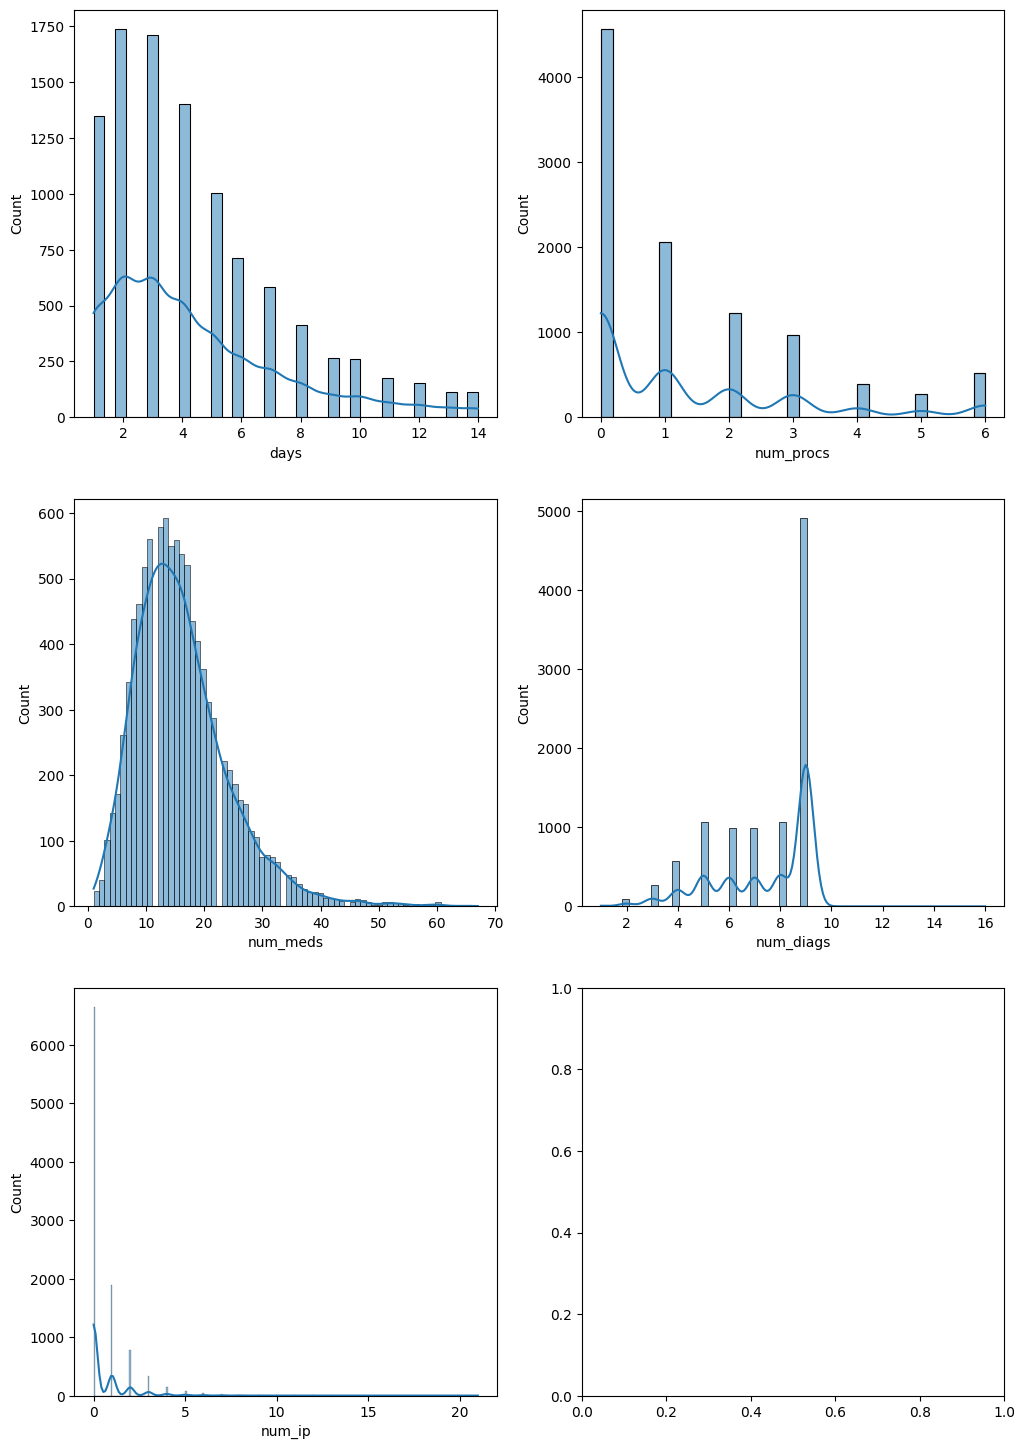

In [10]:
# create univariate distributions for numeric variables
fig, axes = plt.subplots(3, 2, figsize=(12, 6*3))
for i, col in enumerate( df[["days", "num_procs", "num_meds", "num_diags", "num_ip"]]):      
    row_index = i // 2
    col_index = i % 2

    sns.histplot(df[col], ax=axes[row_index, col_index], kde=True)
    #df.boxplot(column=col, ax=axes[row_index, col_index])

#plt.tight_layout()
plt.show()

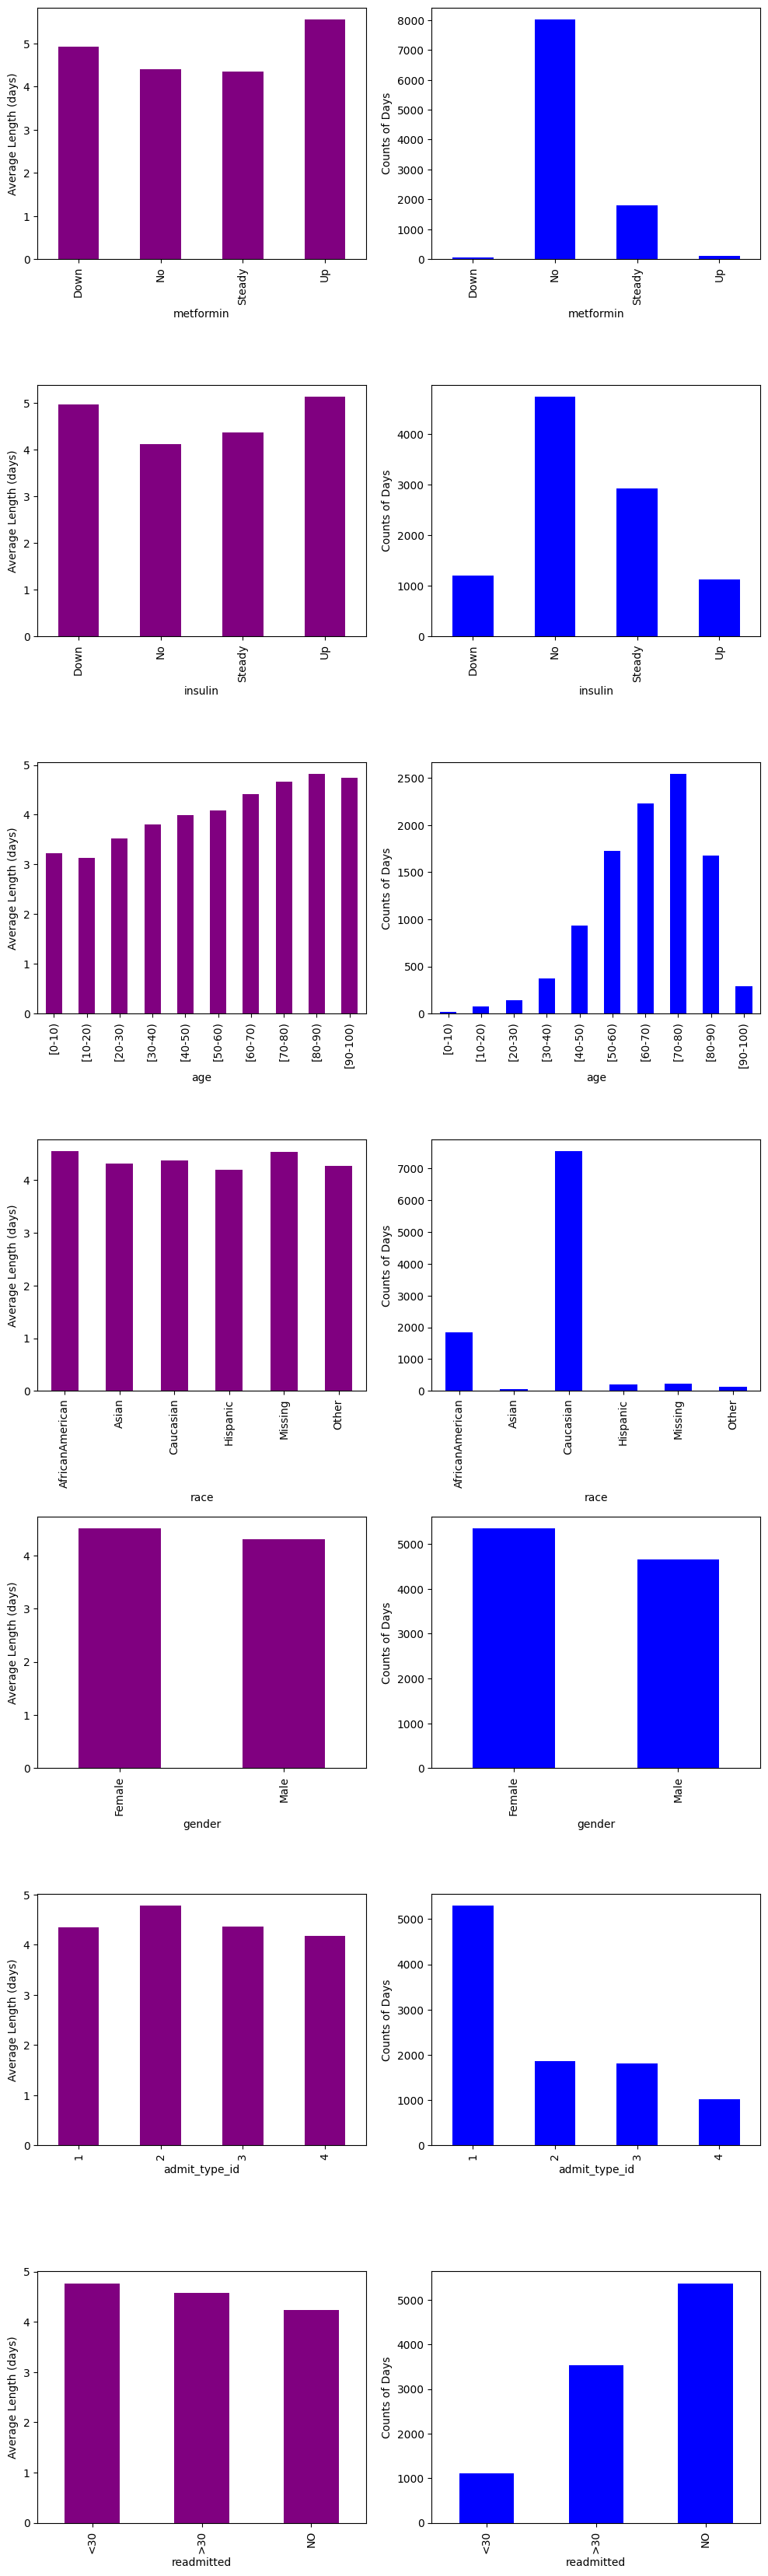

In [11]:
# univariate distributions of non-numerica variables in bar charts
fig, axes = plt.subplots(7, 2, figsize=(12, 6*7), gridspec_kw={'hspace': 0.5})

#for i, col in enumerate( df[["gender", "age", "race", "admit_type_id", "metformin", "insulin", "readmitted"]]):     
for i, col in enumerate( df[["metformin", "insulin", "age", "race","gender",  "admit_type_id",  "readmitted"]]):  

    df.groupby(col)['days'].mean().plot(kind='bar', color='purple', ax=axes[i, 0], ylabel="Average Length (days)")
    df.groupby(col)['days'].count().plot(kind='bar', color='blue', ax=axes[i, 1], ylabel="Counts of Days")

plt.show()

In [12]:
# combine the categories of Asian, Hispanic, and Other
print( df.race.value_counts() )
df.loc[df['race']=='Asian', 'race'] = "Asian/Hispanic/Other"
df.loc[df['race']=='Hispanic', 'race'] = "Asian/Hispanic/Other"
df.loc[df['race']=='Other', 'race'] = "Asian/Hispanic/Other"

print( df.race.value_counts() )
print(df.info())

race
Caucasian          7531
AfricanAmerican    1848
Missing             226
Hispanic            199
Other               130
Asian                63
Name: count, dtype: int64
race
Caucasian               7531
AfricanAmerican         1848
Asian/Hispanic/Other     392
Missing                  226
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 9997 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   days           9997 non-null   int64 
 1   gender         9997 non-null   object
 2   age            9997 non-null   object
 3   race           9997 non-null   object
 4   admit_type_id  9997 non-null   object
 5   metformin      9997 non-null   object
 6   insulin        9997 non-null   object
 7   readmitted     9997 non-null   object
 8   num_procs      9997 non-null   int64 
 9   num_meds       9997 non-null   int64 
 10  num_ip         9997 non-null   int64 
 11  num_diags   

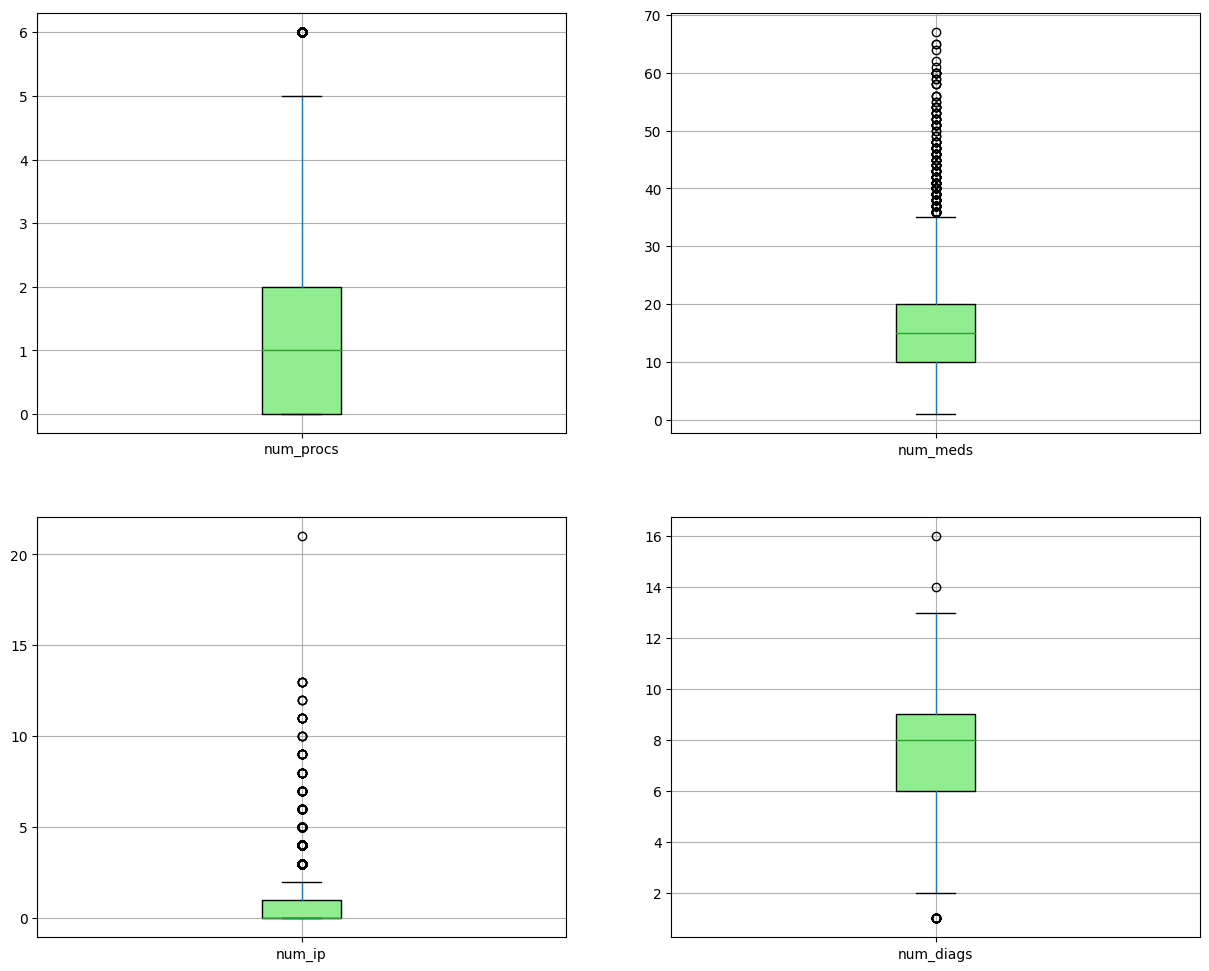

In [13]:
# check distributions of numeric variables
fig, axes = plt.subplots(2, 2, figsize=(15, 6*2))
for i, col in enumerate( df[["num_procs", "num_meds", "num_ip", "num_diags"]]):    
    row_index = i // 2
    col_index = i % 2

    df.boxplot(column=col, ax=axes[row_index, col_index], patch_artist=True, boxprops=dict(facecolor='lightgreen'))
    #axes[row_index, col_index].set_title(col)

#plt.tight_layout()
plt.show() 

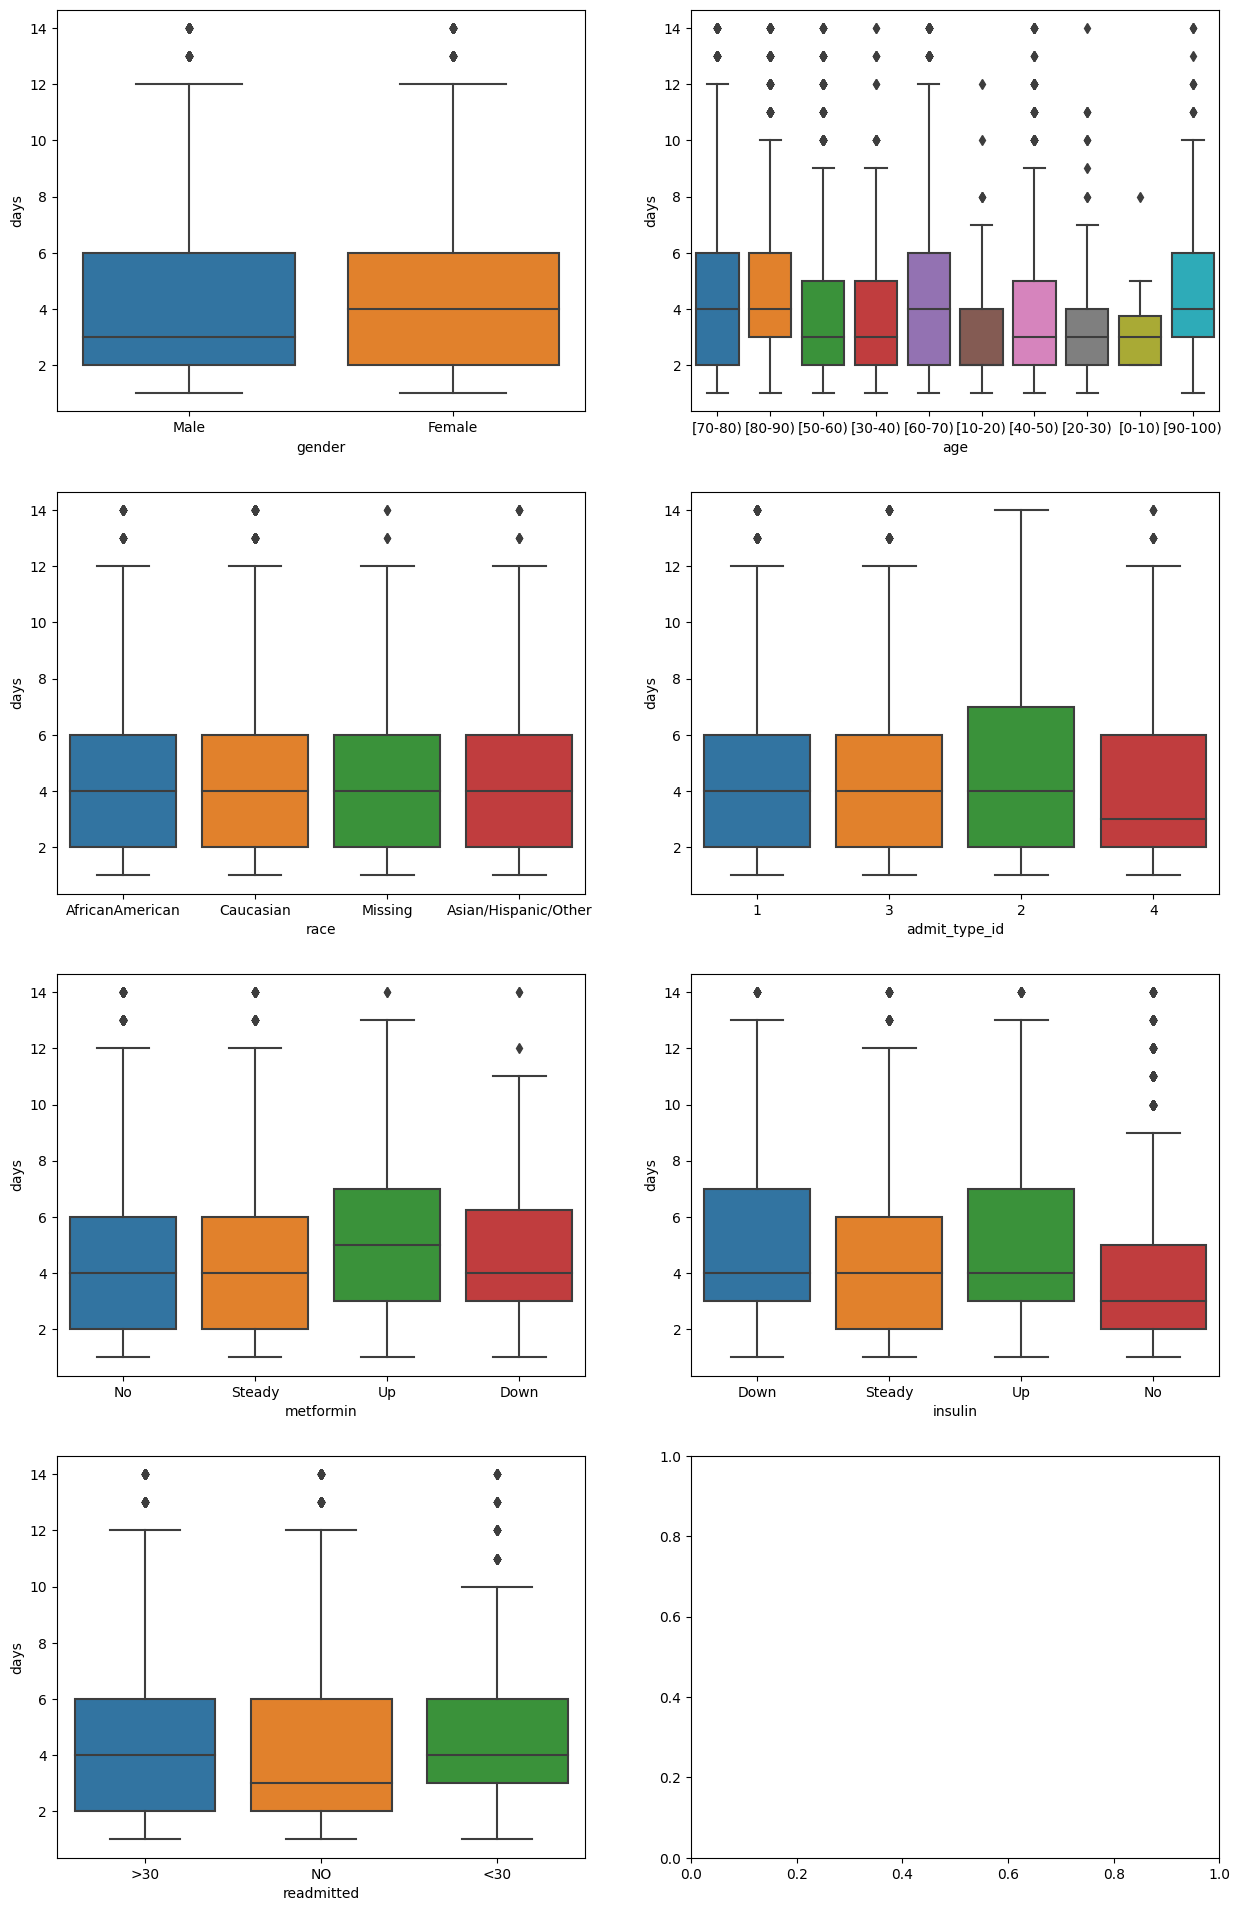

In [14]:
# create box plots for non-numeric variables
fig, axes = plt.subplots(4, 2, figsize=(15, 6*4))
for i, col in enumerate( df[["gender", "age", "race", "admit_type_id", "metformin", "insulin", "readmitted"]]):    
    row_index = i // 2
    col_index = i % 2

    sns.boxplot(x=col, y="days", data=df, ax=axes[row_index, col_index])
    #df.boxplot(column=col, ax=axes[row_index, col_index])

#plt.tight_layout()
plt.show() 

Correlation Matrix:
               days  num_procs  num_meds    num_ip  num_diags
days       1.000000   0.191466  0.472281  0.068170   0.205947
num_procs  0.191466   1.000000  0.371775 -0.064926   0.081533
num_meds   0.472281   0.371775  1.000000  0.066498   0.265948
num_ip     0.068170  -0.064926  0.066498  1.000000   0.108118
num_diags  0.205947   0.081533  0.265948  0.108118   1.000000


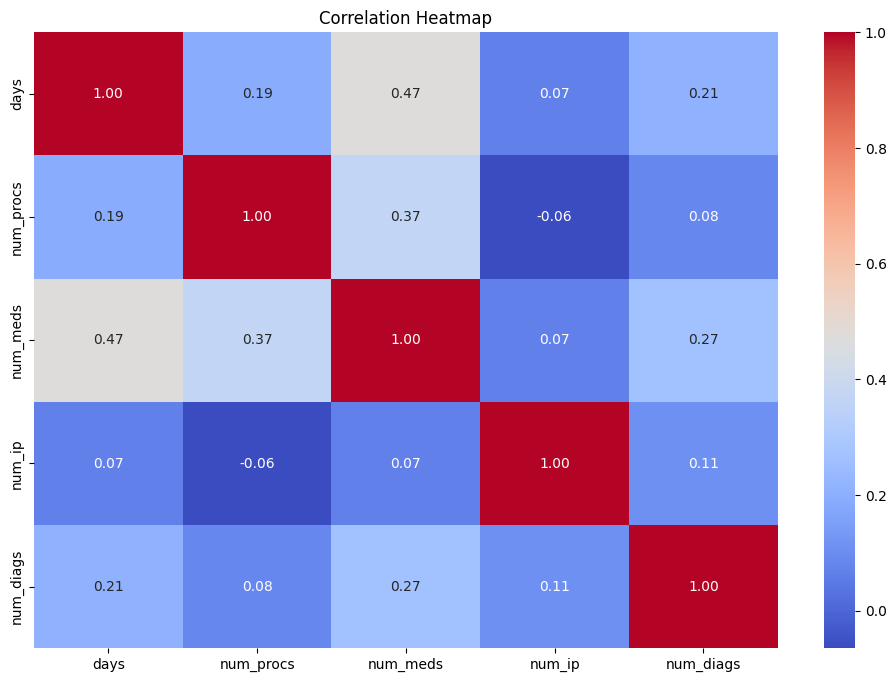

In [15]:
# check correlations
correlation_matrix = df.select_dtypes(include=['int64','float']).corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

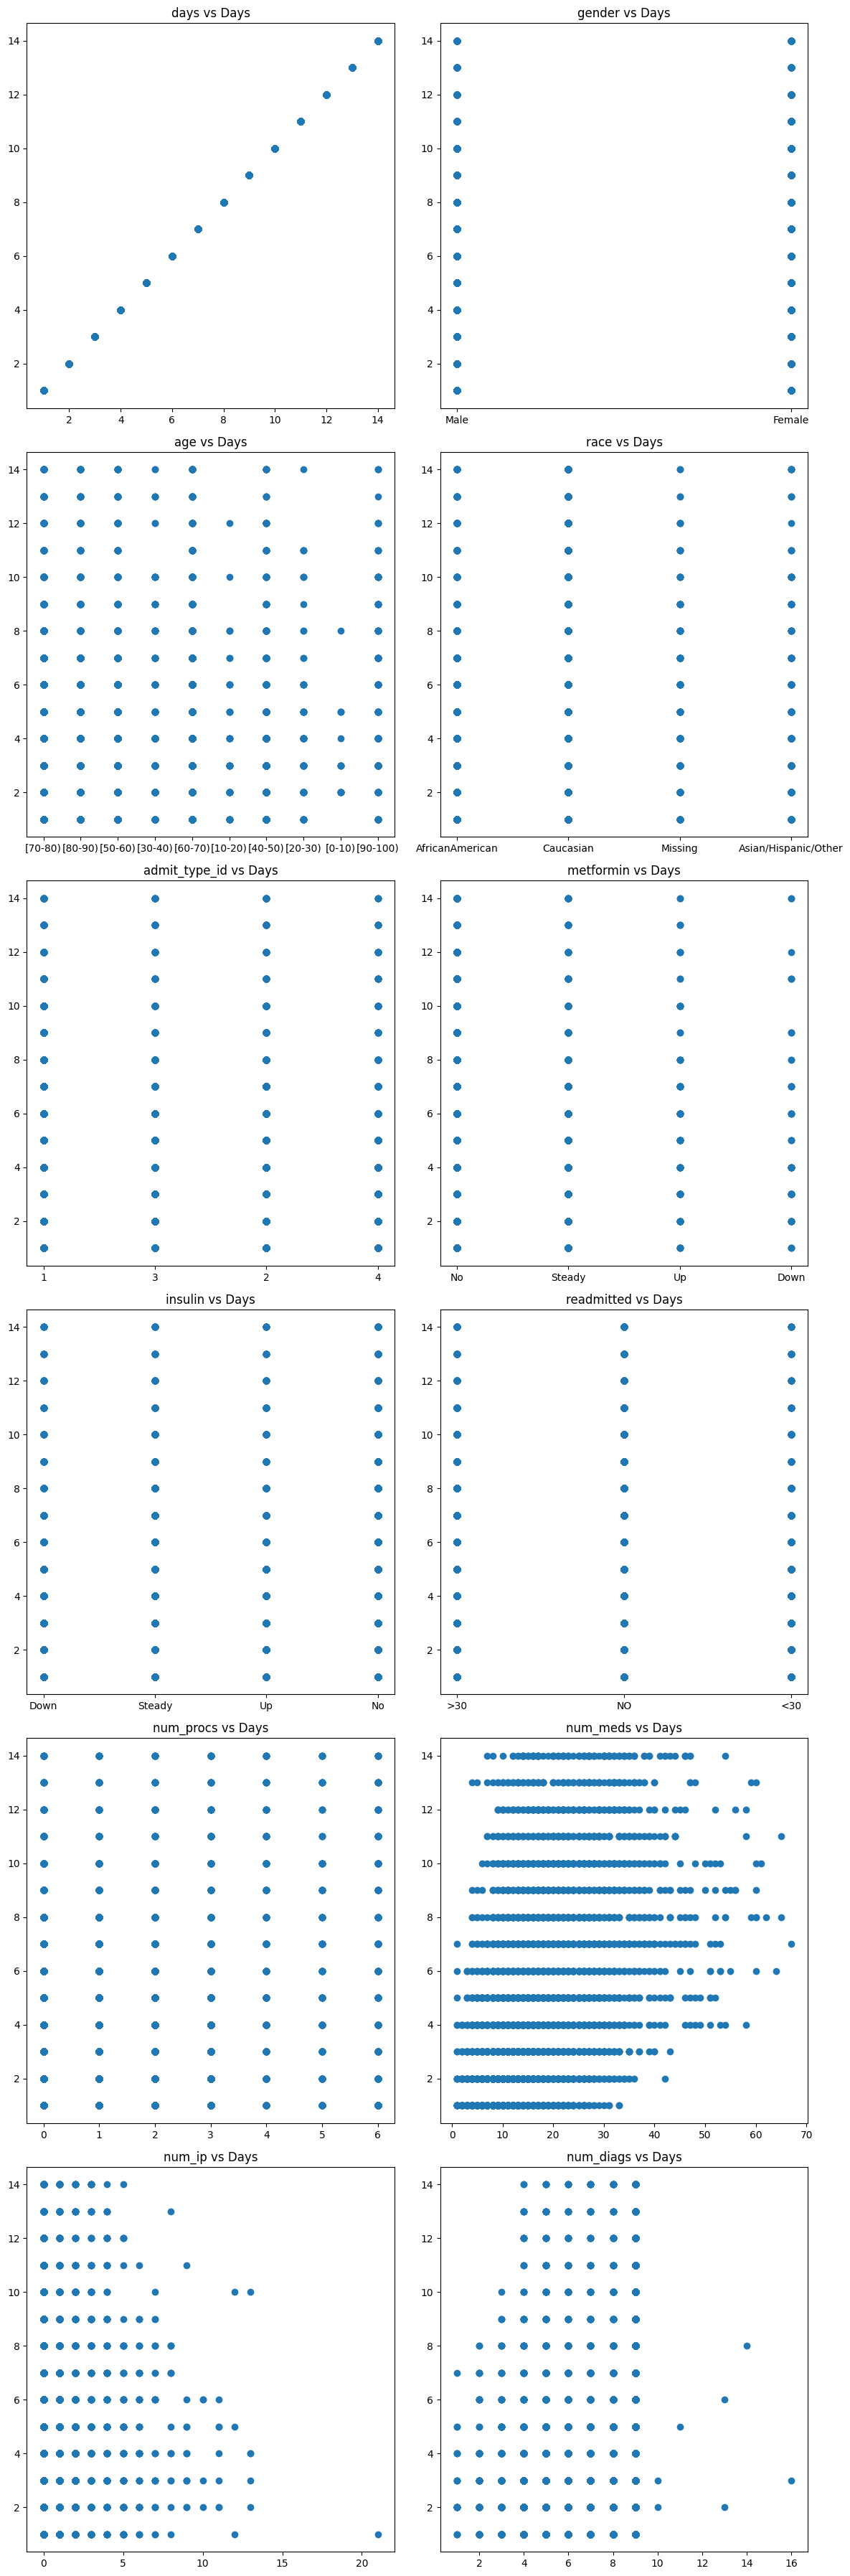

In [16]:
# create scatter plots
num_columns = len(df.columns)
num_rows = (num_columns + 1) // 2  # Add 1 to handle odd number of columns

# Create a new figure with subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6*num_rows))

# Flatten the axes array if there is only one row
if num_rows == 1:
    axes = axes.reshape(1, -1)

# Iterate over the columns of the DataFrame
for i, column in enumerate(df.columns):
    # Calculate the position of the subplot in the grid
    row_index = i // 2
    col_index = i % 2

    # Create scatter plot for the current column versus 'Days'
    axes[row_index, col_index].scatter(df[column], df['days'])

    # Set title for the subplot
    axes[row_index, col_index].set_title(f"{column} vs Days")

# Adjust layout spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

In [17]:
# check and remove outliers, reset the index and drop the original index
df2 = df[df["num_ip"]<20].reset_index(drop=True)

In [76]:
####################################################################
### Part C: Feature Selection                                    ###
####################################################################

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import OrdinalEncoder

X = df2.drop(columns=['days'])  # Adjust 'target_column' to your target variable
y = df2['days']


########################################################
### Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

### Lasso Regression and RFECV (with estimator= SVR(kernel='linear') require encoding the categorical variables in advance 
# Encode categorical variables
X_encoded = X.copy()  # Create a copy of X to avoid modifying the original DataFrame
X_encoded[categorical_columns] = OrdinalEncoder().fit_transform(X[categorical_columns])

########################################################
### split data into train,validation and test

X_train, X_rem, y_train, y_rem = train_test_split(X_encoded, y, test_size=0.3, random_state=1)
X_vald, X_test, y_vald, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=2)
print(y_train.shape, y_vald.shape, y_test.shape )

# # Scale the numeric data using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_vald = scaler.transform(X_vald)
X_test = scaler.transform(X_test)


(6997,) (1499,) (1500,)


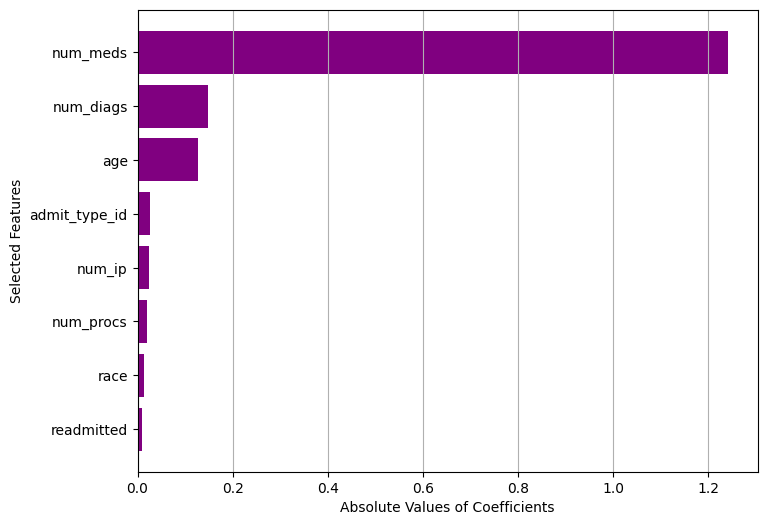

In [20]:
# C.1 Lasso Regression for Feature Selection
from sklearn.linear_model import Lasso

# Fit Lasso regression model
lasso = Lasso(alpha=0.1)  # Set alpha value for Lasso regularization
lasso.fit(X_train, y_train)

# Extract selected features
colnames = X.columns.values

# Filter values greater than 0
filtered_data = [(n, v) for n, v in zip(colnames, lasso.coef_) if abs(v) > 0]

# Sort filtered data by absolute values
sorted_data = sorted(filtered_data, key=lambda x: abs(x[1]), reverse=False)

# Extract sorted names and values
sorted_names = [x[0] for x in sorted_data]
sorted_values = [abs(x[1]) for x in sorted_data]

# Plot horizontal bar chart
plt.figure(figsize=(8, 6))
plt.barh(sorted_names, sorted_values, color='purple')
plt.xlabel('Absolute Values of Coefficients')
plt.ylabel('Selected Features')
#plt.title('Horizontal Bar Chart for Absolute Values (Absolute Values > 0)')
plt.grid(axis='x')
plt.show()

Optimal number of features:  8
Optimal Features:  Index(['age', 'race', 'admit_type_id', 'readmitted', 'num_procs', 'num_meds',
       'num_ip', 'num_diags'],
      dtype='object')
Sorted Features:  ['age' 'race' 'admit_type_id' 'readmitted' 'num_procs' 'num_meds' 'num_ip'
 'num_diags' 'gender' 'metformin' 'insulin']


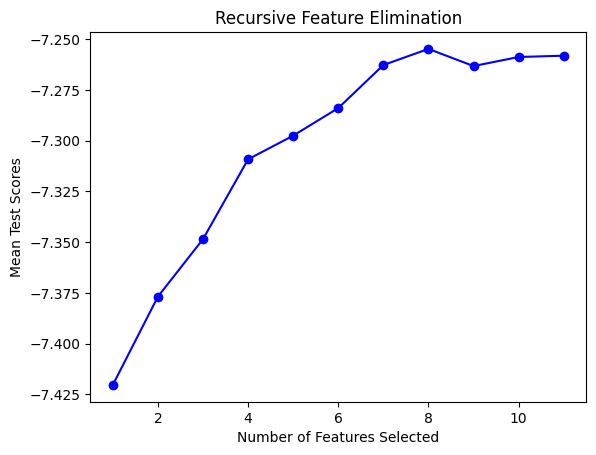

In [21]:
# C.2 Recursive Feature Elimination-Cross Validation (RFECV) for Feature Selection

from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVR
import matplotlib.pyplot as plt

cv = StratifiedKFold(5)

# 'neg_mean_squared_error': Measures the mean squared error of the model's predictions (negative value).
#rfecv = RFECV( estimator= LinearRegression(), step=1, cv=cv, scoring="neg_mean_squared_error", min_features_to_select= 1, n_jobs=2)
rfecv = RFECV( estimator= SVR(kernel='linear'), step=1, cv=cv, scoring="neg_mean_squared_error", min_features_to_select= 1, n_jobs=2)
rfecv.fit(X_train, y_train)

# print only the optimal features
print("Optimal number of features: ", rfecv.n_features_)
# Filter the names of the optimal features based on the "support mask" (values of true and false)
# all optimal features are assigned the same rank of 1 in RFECV
optimal_feature_names = X.columns[rfecv.support_]
print("Optimal Features: ", optimal_feature_names)
# Optimal number of features:  8
# Optimal Features: ['age', 'race', 'admit_type_id', 'readmitted', 'num_procs', 'num_meds', 'num_ip', 'num_diags']

# print all features based on their importance
# note that, the best 7 features share the same rank of 1
sorted_indices = np.argsort(rfecv.ranking_)
sorted_features = X.columns.values[sorted_indices]
print("Sorted Features: ", sorted_features)


# create a plot
plt.figure()
plt.xlabel("Number of Features Selected")
plt.ylabel("Mean Test Scores")

n_scores = len(rfecv.cv_results_["mean_test_score"])
plt.plot(range(1,n_scores+1), rfecv.cv_results_["mean_test_score"],  marker='o', linestyle='-', color="blue")
plt.title("Recursive Feature Elimination")
plt.show()

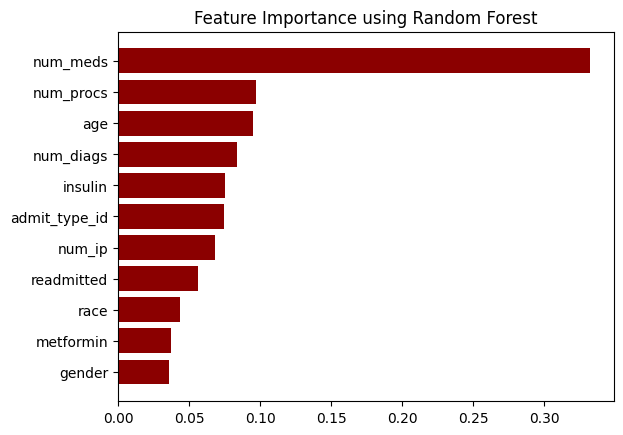

In [22]:
# C.3 Random Forest for Feature Selection

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
sorted_idx = rf.feature_importances_.argsort()

colnames = df2.columns.values
plt.barh(colnames[1:12][sorted_idx], rf.feature_importances_[sorted_idx], color="darkred")
plt.title("Feature Importance using Random Forest")
plt.show()


In [77]:
####################################################################
### Part D: Model Development                                    ###
####################################################################

# Subset the Optimal Features
# Only use these features for building models
# ['gender' 'age' 'race' 'admit_type_id' 'metformin' 'insulin' 'readmitted' 'num_procs' 'num_meds' 'num_ip' 'num_diags']

X_train = X_train[:, [1,2,3,6,7,8,9,10]]
X_vald = X_vald[:, [1,2,3,6,7,8,9,10]]
X_test = X_test[:, [1,2,3,6,7,8,9,10]]

Mean Squared Error: 0
R-squared Score:  0.24685971650534633


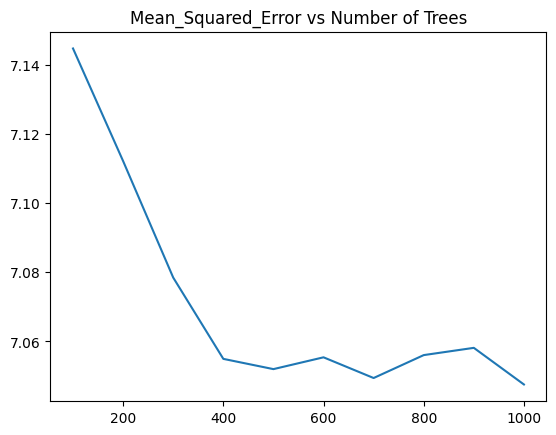

In [84]:
# D.1 Random Forest model

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Evaluate the model
mse_list = []
best_mse = 0
for n in range(100, 1001, 100):
    rf_regressor = RandomForestRegressor(n_estimators= n, random_state=42)
    rf_regressor.fit(X_train, y_train)

    y_pred = rf_regressor.predict(X_vald)
    mse = mean_squared_error(y_vald, y_pred)
    r2 = r2_score(y_vald, y_pred)

    mse_list.append(mse)

    if best_mse > mse:
        best_mse = mse
        r2_at_best_mse = r2
        best_RF_regressor = rf_regressor.fit(X_train, y_train)        

print("Mean Squared Error:", best_mse)
print("R-squared Score: ", r2_at_best_mse)

plt.plot(range(100, 1001, 100), mse_list)
plt.title("Mean_Squared_Error vs Number of Trees")
plt.show()


In [85]:
print(min(mse_list))


7.0475403516179655


In [86]:
# D.2 Neural Network model

from sklearn.neural_network import MLPRegressor

mse_list = []
hidden_layer_sizes_list = [(50,), (100,), (150,), (50, 50), (100, 50), (100, 100), (150,50), (150,100), (150,150)]
for hidden_layer in hidden_layer_sizes_list:
    mlp_regressor = MLPRegressor(hidden_layer_sizes=hidden_layer, activation='relu', solver='adam', max_iter=1000, random_state=45)
   
    # Train the regressor on the training data
    mlp_regressor.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = mlp_regressor.predict(X_vald)

    # Evaluate the model
    mse = mean_squared_error(y_vald, y_pred)
    mse_list.append(mse)

min_mse = min(mse_list)
min_index = mse_list.index(min_mse)
best_hidden_layer_setting = hidden_layer_sizes_list[min_index]

print("Lowest MSE: ",min_mse)
print("best_hidden_layer_setting: ", best_hidden_layer_setting)

Lowest MSE:  6.273485817849236
best_hidden_layer_setting:  (100,)


In [87]:
# D.3 GBM model
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 0.5],
}

# Initialize the XGBoost regressor
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', random_state=43)

# Perform grid search
grid_search = GridSearchCV(estimator=xgb_regressor, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train the model with the best parameters
best_xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', random_state=42, **best_params)
best_xgb_reg.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = best_xgb_reg.predict(X_vald)

# Evaluate the model
mse = mean_squared_error(y_vald, y_pred)
print("Mean Squared Error:", mse)

Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'reg_alpha': 0.1, 'reg_lambda': 0.5, 'subsample': 1.0}
Mean Squared Error: 6.211906547576863


In [74]:
####################################################################
### Part E: Best Model and Performance                           ###
####################################################################

import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# use the best model to make predictions on the testing data
y_pred = best_xgb_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 6.181992288448875


In [88]:
print(y_test[0:10])
print(y_pred[0:10])

9251    1
5086    2
1282    5
5597    3
146     3
260     3
4089    2
5689    2
4236    6
8961    3
Name: days, dtype: int64
[4.7536225 6.6908603 4.266188  2.8739896 3.4454403 3.5235472 3.553572
 6.902868  4.46441   7.296057 ]
